In [56]:
import  dl_utils.data.data_generator as dg
import matplotlib.pyplot as plt
import tensorflow as tf
import importlib

----------- train cats ------------
/mnt/data/Personal/coursera/DL/data/dogscats/sample/train/cats/*.jpg
----------- train dogs ------------
/mnt/data/Personal/coursera/DL/data/dogscats/sample/train/dogs/*.jpg
----------- valid cats ------------
/mnt/data/Personal/coursera/DL/data/dogscats/sample/valid/cats/*.jpg
----------- valid dogs ------------
/mnt/data/Personal/coursera/DL/data/dogscats/sample/valid/dogs/*.jpg
Tensor("arg0:0", shape=(), dtype=string) Tensor("arg1:0", shape=(), dtype=int32)
dict_keys(['input_1']) [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
(5, 224, 224, 3)


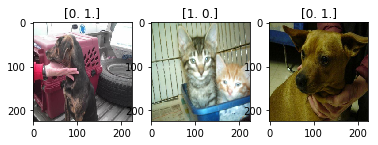

In [57]:
# reload get_data_generator
importlib.reload(dogscats)

# create session
sess = tf.Session()

modes = ['train', 'valid']                                                                                                                                                                                     
classes = ['cats', 'dogs']
data_dir='/mnt/data/Personal/coursera/DL/data/dogscats/sample'


next_batch = dg.get_img_generator(data_dir=data_dir, modes=modes, classes=classes, nb_batches=5, nb_buffers=256, nb_repeats=1, one_hot=True)
# keep creating batches
while True:
    try:
        imgs, labels = sess.run(next_batch)
        print(imgs.keys(), labels)
        print(imgs['input_1'].shape)
        plt.subplot(1,3,1)
        plt.imshow(imgs['input_1'][0])
        plt.title(labels[0])
        plt.subplot(1,3,2)
        plt.imshow(imgs['input_1'][1])
        plt.title(labels[1])
        plt.subplot(1,3,3)
        plt.imshow(imgs['input_1'][2])
        plt.title(labels[2])
        plt.show()
        break
    except tf.errors.OutOfRangeError:
        print('End of dataset')
        break

# close the session
sess.close()